In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. EDA

In [149]:
medical = pd.read_csv('longyear-obese-hypertensive-40-57-medical-sample.csv')

<ipython-input-149-cc2511a2793d>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  medical = pd.read_csv('longyear-obese-hypertensive-40-57-medical-sample.csv')


In [150]:
medical.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,2023-08-11,CA,900.0,55.0,F,Independent Laboratory,...,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


In [151]:
medical.shape

(5000000, 34)

In [152]:
medical_small = pd.read_csv('longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv')

In [153]:
medical_small.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,2023-08-11,CA,900.0,55.0,F,Independent Laboratory,...,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


In [154]:
medical_small.shape

(623525, 34)

It seems the difference between small sample and regular sample is just the number of rows, I will just continue with the samll sample for faster running of the script.

In [155]:
medical_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623525 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [156]:
medical_small.describe()

,patient_short_zip,patient_age,ref_npi,hcp_npi,hco_npi,rev_center_code,rev_center_units,proc_units,line_charge,claim_charge,smart_allowed
count,623512.000000,616980.000000,2.975010e+05,4.346530e+05,6.177890e+05,113926.000000,621558.000000,621331.000000,623525.000000,623525.000000,623525.000000
mean,907.514954,59.416910,1.502083e+09,1.508734e+09,1.485095e+09,456.083449,1.243236,4.319060,482.437268,482.437268,190.295642
std,40.034735,9.946158,2.868359e+08,2.825083e+08,2.859965e+08,451.591644,2.458118,55.208116,3582.592825,3582.592825,509.339625
min,74.000000,30.000000,1.003001e+09,1.003001e+09,1.003006e+09,1.000000,-14.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,55.000000,1.255437e+09,1.265668e+09,1.245340e+09,301.000000,1.000000,1.000000,10.000000,10.000000,18.190000
50%,911.000000,60.000000,1.508952e+09,1.528016e+09,1.467631e+09,320.000000,1.000000,1.000000,70.000000,70.000000,75.230000
75%,922.000000,65.000000,1.740350e+09,1.740376e+09,1.720295e+09,521.000000,1.000000,1.000000,200.000000,200.000000,182.360000
max,999.000000,80.000000,1.992999e+09,1.993000e+09,1.992995e+09,3103.000000,730.000000,12473.000000,778750.000000,778750.000000,45035.960000


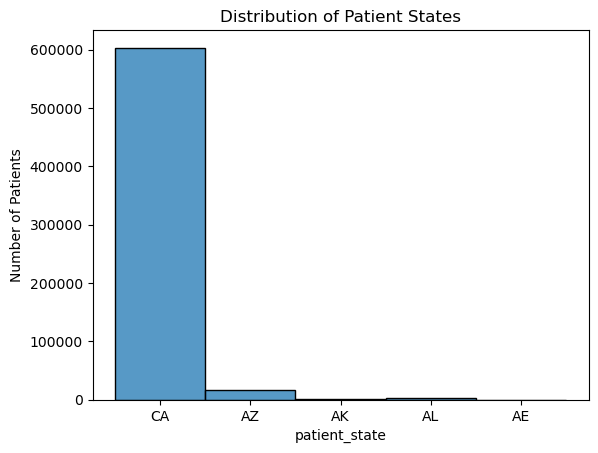

In [157]:
sns.histplot(medical_small['patient_state'])
plt.title('Distribution of Patient States')
plt.ylabel('Number of Patients')
plt.show()

Most patients are from California.

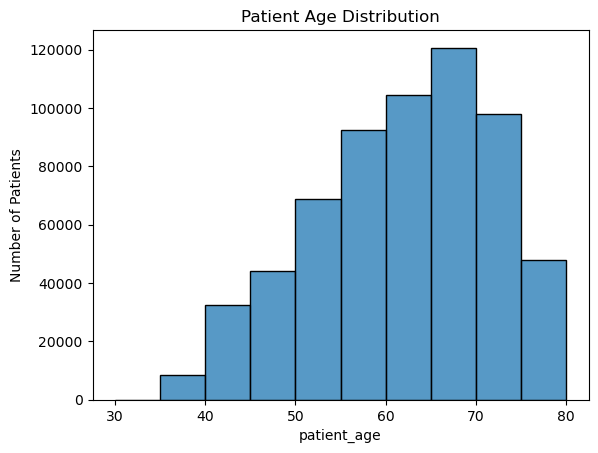

In [158]:
sns.histplot(medical_small['patient_age'],bins=10)
plt.ylabel('Number of Patients')
plt.title('Patient Age Distribution')
plt.show()

Almost all patients are above 35 years old and most patients are older than 60 years old

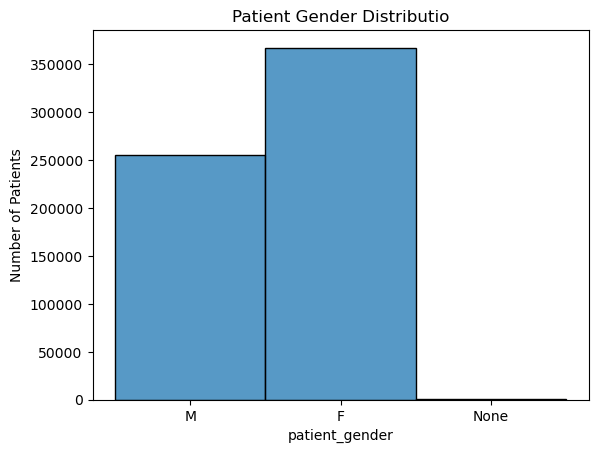

In [159]:
sns.histplot(medical_small['patient_gender'])
plt.ylabel('Number of Patients')
plt.title('Patient Gender Distributio')
plt.show()

There are moe femal patients then male patients

In [160]:
medical_small.columns

Index(['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
       'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
       'place_of_service', 'visit_type', 'payor', 'payor_channel', 'ref_npi',
       'hcp_npi', 'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 'hcp_npi_list',
       'hco_npi_list', 'diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4',
       'diag_5', 'rev_center_code', 'rev_center_units', 'proc_code',
       'proc_modifier', 'proc_units', 'line_charge', 'claim_charge',
       'smart_allowed'],
      dtype='object')

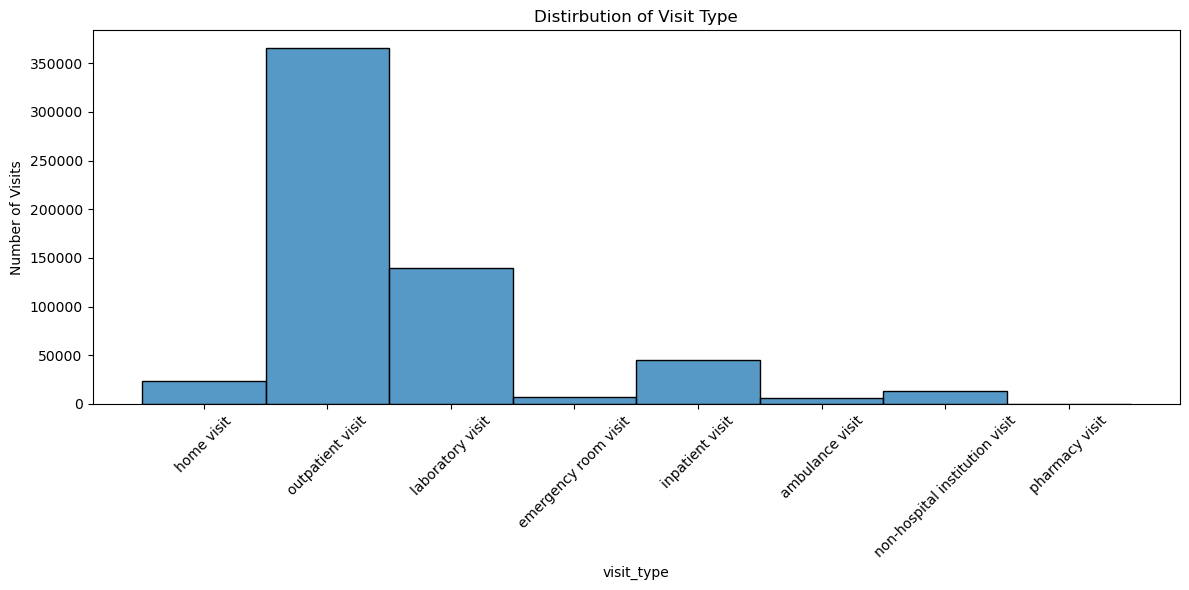

In [161]:
plt.figure(figsize = (12,6))
sns.histplot(medical_small['visit_type'])
plt.ylabel('Number of Visits')
plt.title('Distirbution of Visit Type')
# Rotate the xsticks so they don't overlap
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

Outpatient visit is the most frequent visit in the dataset, it might indicate that most visits are not medical emergencies,

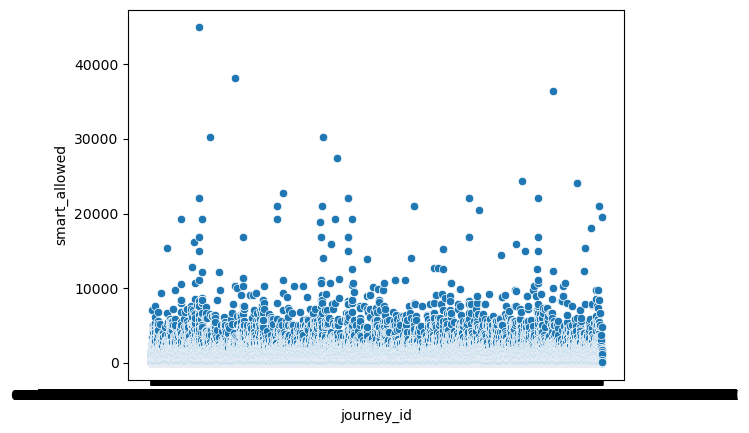

In [162]:
sns.scatterplot(x = 'journey_id', y ='smart_allowed', data = medical_small)
plt.show()

Most patients paid less than $10000 throughout the entire patient journey. 

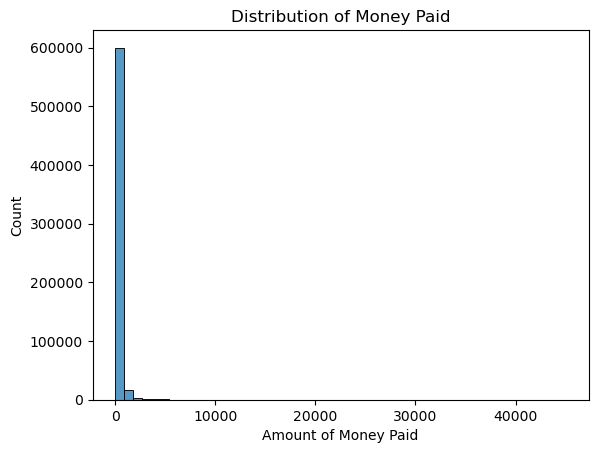

In [163]:
sns.histplot(medical_small['smart_allowed'], bins = 50)
plt.xlabel('Amount of Money Paid')
plt.title('Distribution of Money Paid')
plt.show()

Need to log the Y value because the data has a long-tailed distribution

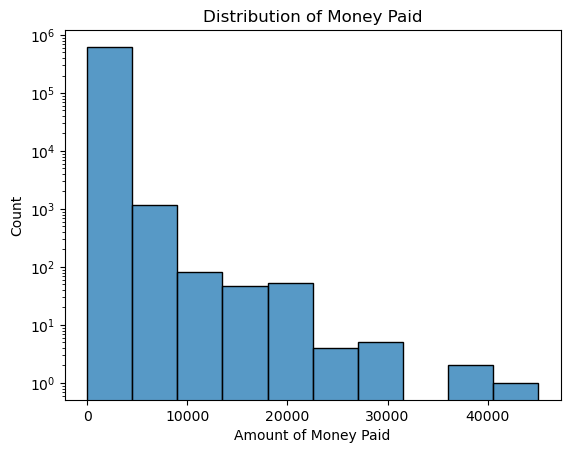

In [164]:
sns.histplot(medical_small['smart_allowed'], bins=10)
plt.xlabel('Amount of Money Paid')
plt.title('Distribution of Money Paid')
plt.yscale('log')  # Set the y-axis to a log scale
plt.show()

In [165]:
prescription_samll = pd.read_csv('longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')

<ipython-input-165-c6c15b819640>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  prescription_samll = pd.read_csv('longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')


In [166]:
prescription_samll.head()

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,...,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,65862059805,True,190001,None


In [167]:
prescription_samll.shape

(894623, 48)

In [168]:
prescription_samll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894623 entries, 0 to 894622
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     894623 non-null  object 
 1   cohort_id                      894623 non-null  int64  
 2   claim_id                       894623 non-null  object 
 3   patient_gender                 894623 non-null  object 
 4   patient_state                  894623 non-null  object 
 5   patient_zip                    894623 non-null  object 
 6   patient_dob                    894623 non-null  object 
 7   pharmacy_npi                   894623 non-null  object 
 8   pharmacist_npi                 894623 non-null  object 
 9   prescriber_npi                 894623 non-null  object 
 10  primary_care_npi               894623 non-null  object 
 11  group_id                       894623 non-null  object 
 12  date_of_service               

In [169]:
prescription_samll.describe()

,cohort_id,ndc11,number_of_refills_authorized,quantity_prescribed_original,quantity_dispensed,fill_number,days_supply,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,plan_pay,ndc,start_date
count,894623.000000,8.946230e+05,849519.000000,322348.00000,8.946160e+05,894623.000000,894623.000000,5.0,7.850810e+05,601820.000000,411383.000000,491878.000000,8.946230e+05,894623.000000
mean,16.065902,3.913810e+10,2.496945,11.03221,7.151479e+01,0.855659,41.070293,99.0,4.547052e+02,10.890529,7.075289,167.327912,3.913810e+10,190740.803998
std,0.248110,2.808575e+10,6.861014,85.75864,3.589294e+03,1.600734,29.708626,0.0,4.805967e+04,96.639674,59.716082,802.330352,2.808575e+10,2830.185124
min,16.000000,2.143301e+06,-1.000000,0.00000,0.000000e+00,0.000000,0.000000,99.0,-7.370000e+00,-189.700000,-3198.400000,-1458.620000,2.143301e+06,190001.000000
25%,16.000000,9.046999e+08,0.000000,0.00000,3.000000e+01,0.000000,30.000000,99.0,2.799000e+01,0.000000,0.000000,2.290000,9.046999e+08,190001.000000
50%,16.000000,4.948305e+10,1.000000,0.00000,3.000000e+01,0.000000,30.000000,99.0,9.526000e+01,0.000000,1.350000,13.580000,4.948305e+10,190001.000000
75%,16.000000,6.586206e+10,3.000000,0.00000,9.000000e+01,1.000000,50.000000,99.0,3.220600e+02,4.000000,4.150000,36.300000,6.586206e+10,190001.000000
max,17.000000,9.920701e+10,99.000000,10000.00000,3.390291e+06,99.000000,999.000000,99.0,4.252220e+07,25598.020000,6923.160000,50307.120000,9.920701e+10,202308.000000


In [170]:
prescription_samll.isna().sum()

journey_id                            0
cohort_id                             0
claim_id                              0
patient_gender                        0
patient_state                         0
patient_zip                           0
patient_dob                           0
pharmacy_npi                          0
pharmacist_npi                        0
prescriber_npi                        0
primary_care_npi                      0
group_id                              0
date_of_service                       0
date_authorized                       0
transaction_type                      0
date_prescription_written             0
ndc11                                 0
ndc11_original                        0
number_of_refills_authorized      45104
diagnosis_code                    80548
diagnosis_code_type                   0
quantity_prescribed_original     572275
quantity_dispensed                    7
place_of_service                      0
is_service                            0


In [171]:
prescription_samll.columns

Index(['journey_id', 'cohort_id', 'claim_id', 'patient_gender',
       'patient_state', 'patient_zip', 'patient_dob', 'pharmacy_npi',
       'pharmacist_npi', 'prescriber_npi', 'primary_care_npi', 'group_id',
       'date_of_service', 'date_authorized', 'transaction_type',
       'date_prescription_written', 'ndc11', 'ndc11_original',
       'number_of_refills_authorized', 'diagnosis_code', 'diagnosis_code_type',
       'quantity_prescribed_original', 'quantity_dispensed',
       'place_of_service', 'is_service', 'level_of_service', 'fill_number',
       'days_supply', 'unit_of_measure', 'daw_code',
       'prior_authorization_type_code', 'is_compound_drug', 'coupon_type',
       'coupon_value_amount', 'pharmacy_submitted_cost', 'patient_pay',
       'copay_coinsurance', 'pcn', 'bin', 'plan_pay', 'reject_code_1',
       'reject_code_3', 'reject_code_4', 'reject_code_5', 'ndc', 'active',
       'start_date', 'end_date'],
      dtype='object')

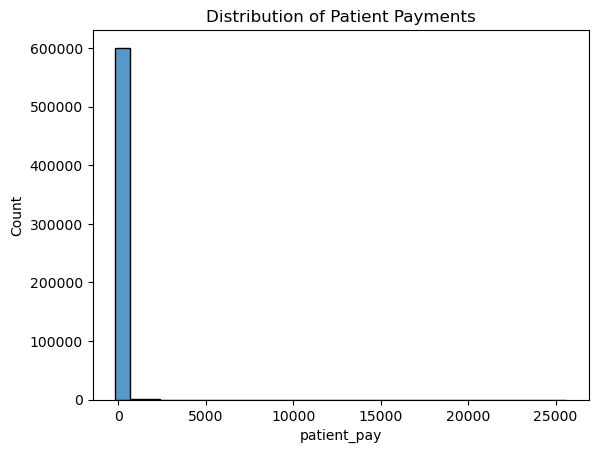

In [172]:
sns.histplot(prescription_samll['patient_pay'], bins = 30)
plt.title('Distribution of Patient Payments')
plt.show()

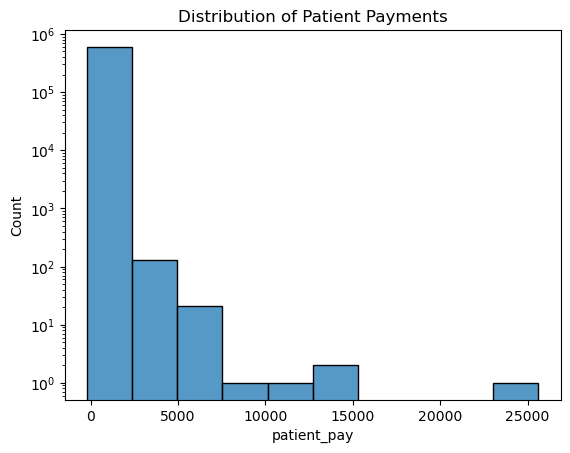

In [173]:
sns.histplot(prescription_samll['patient_pay'], bins = 10)
plt.title('Distribution of Patient Payments')
plt.yscale('log')  # Set the y-axis to a log scale
plt.show()

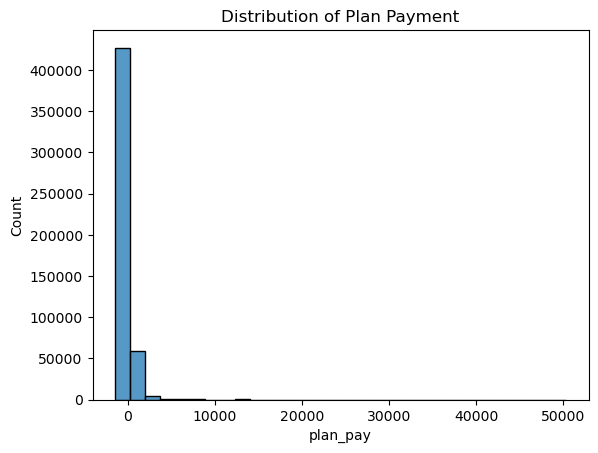

In [174]:
sns.histplot(prescription_samll['plan_pay'], bins = 30)
plt.title('Distribution of Plan Payment')
plt.show()

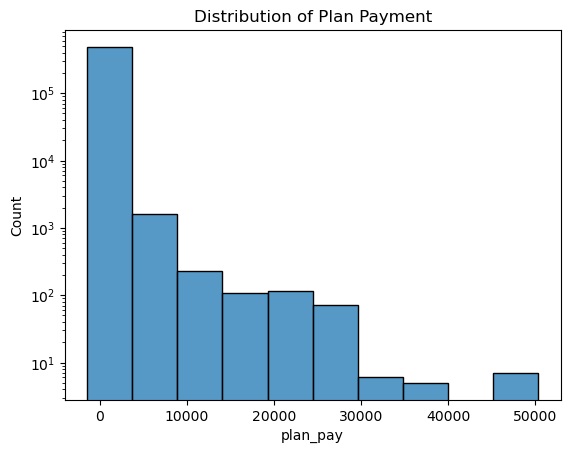

In [175]:
sns.histplot(prescription_samll['plan_pay'], bins = 10)
plt.title('Distribution of Plan Payment')
plt.yscale('log')  # Set the y-axis to a log scale
plt.show()

The Insurance generally pays more than patients, showing that the insurance is playing an important role for patients to afford medical expenses.

## 2. Data Preprocessing and Merging

In [72]:
medical_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623525 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [176]:
# First, choose features that are relevant to the modeling
medical_edited = medical_small.iloc[:,[0,4,5,6,7,8,10,21,22,23,24,25]]
# Use data only beyond 2022 because the google trend shows the use of Ozempic stated raising in 2022
medical_edited = medical_edited[medical_edited['claim_date'] >= '2022-01-01']
medical_edited = medical_edited[(medical_edited['patient_age']>=40) & (medical_edited['patient_age']<=75)] # Follow the objective to see treatment effect of patients aged 40-75
medical_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309795 entries, 2 to 623524
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         309795 non-null  object 
 1   claim_date         309795 non-null  object 
 2   patient_state      309795 non-null  object 
 3   patient_short_zip  309782 non-null  float64
 4   patient_age        309795 non-null  float64
 5   patient_gender     309795 non-null  object 
 6   visit_type         297561 non-null  object 
 7   diag_1             309069 non-null  object 
 8   diag_2             231239 non-null  object 
 9   diag_3             185734 non-null  object 
 10  diag_4             154030 non-null  object 
 11  diag_5             108716 non-null  object 
dtypes: float64(2), object(10)
memory usage: 30.7+ MB


In [177]:
medical_edited.isna().sum()

journey_id                0
claim_date                0
patient_state             0
patient_short_zip        13
patient_age               0
patient_gender            0
visit_type            12234
diag_1                  726
diag_2                78556
diag_3               124061
diag_4               155765
diag_5               201079
dtype: int64

In [178]:
# Drop those entries without zip and visit_type
medical_edited = medical_edited.dropna(subset=['patient_short_zip', 'visit_type'])

In [179]:
# Define functions to encode diagnosis codes
def check_obesity(code):
    if str(code).startswith('E66'):
        return 1
    else:
        return 0

def check_hypertensive(code):
    if str(code).startswith(('I10','I15','I16')):
        return 1
    else:
        return 0

def check_hyperglyceridemia(code):
    if str(code).startswith('E78'):
        return 1
    else:
        return 0

def check_diabetes(code):
    if str(code).startswith(('E13','E11')):
        return 1
    else:
        return 0


In [180]:
# Apply the functions to the diagnosis code 1 and 2 since the data starts getting more
medical_edited['obesity_diag1'] = medical_edited['diag_1'].apply(check_obesity)
medical_edited['obesity_diag2'] = medical_edited['diag_2'].apply(check_obesity)
medical_edited['hypertensive_diag1'] = medical_edited['diag_1'].apply(check_hypertensive)
medical_edited['hypertensive_diag2'] = medical_edited['diag_2'].apply(check_hypertensive)
medical_edited['hyperglyceridemia_diag1'] = medical_edited['diag_1'].apply(check_hyperglyceridemia)
medical_edited['hyperglyceridemia_diag2'] = medical_edited['diag_2'].apply(check_hyperglyceridemia)
medical_edited['diabetes_diag1'] = medical_edited['diag_1'].apply(check_diabetes)
medical_edited['diabetes_diag2'] = medical_edited['diag_2'].apply(check_diabetes)

In [181]:
# To ensure the treatment effect, we use only data entries where the primary diagnosis code that has at least been marked '1' once
medical_edited = medical_edited.query('obesity_diag1 == 1 or hypertensive_diag1 == 1 or hyperglyceridemia_diag1 == 1 or diabetes_diag1 == 1')

In [182]:
# After the completion of encoding categorical variables, I will drop the original ones
medical_edited.drop(medical_edited.columns[7:12], axis=1, inplace=True)

In [108]:
medical_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65088 entries, 37 to 623519
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   journey_id               65088 non-null  object 
 1   claim_date               65088 non-null  object 
 2   patient_state            65088 non-null  object 
 3   patient_short_zip        65088 non-null  float64
 4   patient_age              65088 non-null  float64
 5   patient_gender           65088 non-null  object 
 6   visit_type               65088 non-null  object 
 7   obesity_diag1            65088 non-null  int64  
 8   obesity_diag2            65088 non-null  int64  
 9   hypertensive_diag1       65088 non-null  int64  
 10  hypertensive_diag2       65088 non-null  int64  
 11  hyperglyceridemia_diag1  65088 non-null  int64  
 12  hyperglyceridemia_diag2  65088 non-null  int64  
 13  diabetes_diag1           65088 non-null  int64  
 14  diabetes_diag2      

In [111]:
medical_edited.isna().sum()

journey_id                 0
claim_date                 0
patient_state              0
patient_short_zip          0
patient_age                0
patient_gender             0
visit_type                 0
obesity_diag1              0
obesity_diag2              0
hypertensive_diag1         0
hypertensive_diag2         0
hyperglyceridemia_diag1    0
hyperglyceridemia_diag2    0
diabetes_diag1             0
diabetes_diag2             0
dtype: int64

In order to find the treament effect, leave entries with the NDC Codes that are relevant to Ozempic.
Source: https://dailymed.nlm.nih.gov/dailymed/drugInfo.cfm?setid=adec4fd2-6858-4c99-91d4-531f5f2a2d79

In [183]:
ozempic_ndcs = [169413001, 169413013, 169413211, 169413212, 169413290, 169413297, 169413602, 169413611, 169418103, 169418113, 169418190, 169418197, 169477211, 169477212, 169477290, 169477297]
Prescriotion_ozempic = prescription_samll[prescription_samll['ndc'].isin(ozempic_ndcs)]
Prescriotion_ozempic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10740 entries, 500 to 894608
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   journey_id                     10740 non-null  object 
 1   cohort_id                      10740 non-null  int64  
 2   claim_id                       10740 non-null  object 
 3   patient_gender                 10740 non-null  object 
 4   patient_state                  10740 non-null  object 
 5   patient_zip                    10740 non-null  object 
 6   patient_dob                    10740 non-null  object 
 7   pharmacy_npi                   10740 non-null  object 
 8   pharmacist_npi                 10740 non-null  object 
 9   prescriber_npi                 10740 non-null  object 
 10  primary_care_npi               10740 non-null  object 
 11  group_id                       10740 non-null  object 
 12  date_of_service                10740 non-nu

In [184]:
# After filtering the NDC, Choose relevant features for the prescription dataset
Prescriotion_edited = Prescriotion_ozempic.iloc[:,[0,22,27]] # Provides info of amount of ozempic
prescription_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14832 entries, 0 to 14831
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   journey_id          14832 non-null  object 
 1   quantity_dispensed  14832 non-null  float64
 2   days_supply         14832 non-null  float64
dtypes: float64(2), object(1)
memory usage: 347.8+ KB


In [185]:
# Aggregate by the primary key to do data mining and also better present the supply of the drug to each patient
prescription_edited=prescription_edited.groupby('journey_id')[['quantity_dispensed','days_supply']].sum().reset_index()

In [110]:
prescription_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14832 entries, 0 to 14831
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   journey_id          14832 non-null  object 
 1   quantity_dispensed  14832 non-null  float64
 2   days_supply         14832 non-null  float64
dtypes: float64(2), object(1)
memory usage: 347.8+ KB


In [112]:
prescription_edited.isna().sum()

journey_id            0
quantity_dispensed    0
days_supply           0
dtype: int64

In [113]:
# Right Join on medical dataset because patients might not be treated with Ozempic
df = pd.merge(prescription_edited,medical_edited, on = ['journey_id'], how = 'right')
df.head()

,journey_id,quantity_dispensed,days_supply,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,visit_type,obesity_diag1,obesity_diag2,hypertensive_diag1,hypertensive_diag2,hyperglyceridemia_diag1,hyperglyceridemia_diag2,diabetes_diag1,diabetes_diag2
0,00011020325337a2a22fb26b6492196a,1451.0,1535.0,2022-09-21,CA,922.0,70.0,M,laboratory visit,0,0,0,0,0,1,1,0
1,00011020325337a2a22fb26b6492196a,1451.0,1535.0,2022-09-21,CA,922.0,70.0,M,laboratory visit,0,0,0,0,0,1,1,0
2,00011020325337a2a22fb26b6492196a,1451.0,1535.0,2022-09-21,CA,922.0,70.0,M,laboratory visit,0,0,0,0,0,1,1,0
3,00011020325337a2a22fb26b6492196a,1451.0,1535.0,2022-09-21,CA,922.0,70.0,M,laboratory visit,0,0,0,0,0,1,1,0
4,00012bb21b3136f52c1c0774071f2ec2,NaN,NaN,2023-01-20,CA,910.0,50.0,M,laboratory visit,0,0,0,1,0,0,1,0


In [114]:
df.isna().sum()

journey_id                     0
quantity_dispensed         26015
days_supply                26015
claim_date                     0
patient_state                  0
patient_short_zip              0
patient_age                    0
patient_gender                 0
visit_type                     0
obesity_diag1                  0
obesity_diag2                  0
hypertensive_diag1             0
hypertensive_diag2             0
hyperglyceridemia_diag1        0
hyperglyceridemia_diag2        0
diabetes_diag1                 0
diabetes_diag2                 0
dtype: int64

In [115]:
df['quantity_dispensed'].fillna(0,inplace=True)
df['days_supply'].fillna(0,inplace=True)

In [117]:
df.isna().sum()

journey_id                 0
quantity_dispensed         0
days_supply                0
claim_date                 0
patient_state              0
patient_short_zip          0
patient_age                0
patient_gender             0
visit_type                 0
obesity_diag1              0
obesity_diag2              0
hypertensive_diag1         0
hypertensive_diag2         0
hyperglyceridemia_diag1    0
hyperglyceridemia_diag2    0
diabetes_diag1             0
diabetes_diag2             0
dtype: int64

In [126]:
# Crate treatment column to see if someone received a treatment
df['treatment'] = df['quantity_dispensed'].apply(lambda x: 1 if x > 0 else 0)

In [128]:
df_dummies = pd.get_dummies(df, columns=['patient_state', 'patient_short_zip', 'patient_gender', 'visit_type'],drop_first=True)
df_dummies.head()

,journey_id,quantity_dispensed,days_supply,claim_date,patient_age,obesity_diag1,obesity_diag2,hypertensive_diag1,hypertensive_diag2,hyperglyceridemia_diag1,...,patient_short_zip_996.0,patient_short_zip_997.0,patient_gender_M,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit
0,00011020325337a2a22fb26b6492196a,1451.0,1535.0,2022-09-21,70.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,00011020325337a2a22fb26b6492196a,1451.0,1535.0,2022-09-21,70.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,00011020325337a2a22fb26b6492196a,1451.0,1535.0,2022-09-21,70.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,00011020325337a2a22fb26b6492196a,1451.0,1535.0,2022-09-21,70.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,00012bb21b3136f52c1c0774071f2ec2,0.0,0.0,2023-01-20,50.0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [129]:
df_dummies['year'] = pd.to_datetime(df_dummies['claim_date']).dt.year
df_dummies['month'] = pd.to_datetime(df_dummies['claim_date']).dt.month

In [130]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65088 entries, 0 to 65087
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   journey_id                                 65088 non-null  object 
 1   quantity_dispensed                         65088 non-null  float64
 2   days_supply                                65088 non-null  float64
 3   claim_date                                 65088 non-null  object 
 4   patient_age                                65088 non-null  float64
 5   obesity_diag1                              65088 non-null  int64  
 6   obesity_diag2                              65088 non-null  int64  
 7   hypertensive_diag1                         65088 non-null  int64  
 8   hypertensive_diag2                         65088 non-null  int64  
 9   hyperglyceridemia_diag1                    65088 non-null  int64  
 10  hyperglyceridemia_diag

In [131]:
df2 = df_dummies.drop('claim_date', axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65088 entries, 0 to 65087
Data columns (total 54 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   journey_id                                 65088 non-null  object 
 1   quantity_dispensed                         65088 non-null  float64
 2   days_supply                                65088 non-null  float64
 3   patient_age                                65088 non-null  float64
 4   obesity_diag1                              65088 non-null  int64  
 5   obesity_diag2                              65088 non-null  int64  
 6   hypertensive_diag1                         65088 non-null  int64  
 7   hypertensive_diag2                         65088 non-null  int64  
 8   hyperglyceridemia_diag1                    65088 non-null  int64  
 9   hyperglyceridemia_diag2                    65088 non-null  int64  
 10  diabetes_diag1        

In [132]:
df2 = df2.drop_duplicates(keep='last')
df3 = df2. drop('journey_id',axis=1)

In [134]:
data_diabetes = df3[df3['diabetes_diag1']==1]
data_obesity = df3[df3['obesity_diag1']==1]
data_hyperglyceridemia = df3[df3['hyperglyceridemia_diag1']==1]
data_hypertensive = df3[df3['hypertensive_diag1']==1]

## 3. Causal Analysis Setup

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [258]:

# Split dataset into features and target
X_diabetes = data_diabetes.drop(['treatment', 'obesity_diag1', 'hypertensive_diag1', 'hyperglyceridemia_diag1', 'diabetes_diag1', 'obesity_diag2', 'hypertensive_diag2', 'hyperglyceridemia_diag2', 'diabetes_diag2'], axis=1)

X_obesity = data_obesity.drop(['treatment', 'obesity_diag1', 'hypertensive_diag1', 'hyperglyceridemia_diag1', 'diabetes_diag1', 'obesity_diag2', 'hypertensive_diag2', 'hyperglyceridemia_diag2', 'diabetes_diag2'], axis=1)

X_hypertensive = data_hypertensive.drop(['treatment', 'obesity_diag1', 'hypertensive_diag1', 'hyperglyceridemia_diag1', 'diabetes_diag1', 'obesity_diag2', 'hypertensive_diag2', 'hyperglyceridemia_diag2', 'diabetes_diag2'], axis=1)

X_hyperglyceridemia = data_hyperglyceridemia.drop(['treatment', 'obesity_diag1', 'hypertensive_diag1', 'hyperglyceridemia_diag1', 'diabetes_diag1', 'obesity_diag2', 'hypertensive_diag2', 'hyperglyceridemia_diag2', 'diabetes_diag2'], axis=1)


# Treatment indicator
d_diabetes = data_diabetes['treatment']  
d_obesity = data_obesity['treatment']  
d_hypertensive = data_hypertensive['treatment']
d_hyperglyceridemia = data_hyperglyceridemia['treatment']

# Dependent variable will be the diagnosis_2, if the diagnosis 1 is 1 while the diagnosis 2 is 0, then its proven effective
y_diabetes = data_diabetes['diabetes_diag2']  
y_obesity = data_obesity['obesity_diag2']  
y_hypertensive = data_hypertensive['hypertensive_diag2']
y_hyperglyceridemia = data_hyperglyceridemia['hyperglyceridemia_diag2']



In [201]:
obesity_ols = smf.ols(formula='obesity_diag2 ~ treatment', data = data_diabetes).fit()
print(obesity_ols.summary())

                            OLS Regression Results                            
Dep. Variable:          obesity_diag2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.614
Date:                Wed, 21 Feb 2024   Prob (F-statistic):             0.0178
Time:                        21:01:50   Log-Likelihood:                 1370.8
No. Observations:               12736   AIC:                            -2738.
Df Residuals:                   12734   BIC:                            -2723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0553      0.003     18.171      0.0

In [203]:
# hypertensive
hypertensive_ols = smf.ols(formula='hypertensive_diag2 ~ treatment', data = data_hypertensive).fit()
print(hypertensive_ols.summary())

                            OLS Regression Results                            
Dep. Variable:     hypertensive_diag2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.867
Date:                Wed, 21 Feb 2024   Prob (F-statistic):            0.00504
Time:                        21:05:00   Log-Likelihood:                 1099.5
No. Observations:                9708   AIC:                            -2195.
Df Residuals:                    9706   BIC:                            -2181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0563      0.003     16.725      0.0

In [204]:
# diabetes
diabetes_ols = smf.ols(formula='diabetes_diag2 ~ treatment', data = data_diabetes).fit()
print(diabetes_ols.summary())

                            OLS Regression Results                            
Dep. Variable:         diabetes_diag2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3074
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.579
Time:                        21:07:54   Log-Likelihood:                -4111.0
No. Observations:               12736   AIC:                             8226.
Df Residuals:                   12734   BIC:                             8241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1261      0.005     26.940      0.0

In [205]:
# hyperglyceridemia
hyperglyceridemia_ols = smf.ols(formula='hyperglyceridemia_diag2 ~ treatment', data = data_hyperglyceridemia).fit()
print(hyperglyceridemia_ols.summary())

                               OLS Regression Results                              
Dep. Variable:     hyperglyceridemia_diag2   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.000
Method:                      Least Squares   F-statistic:                    0.3017
Date:                     Wed, 21 Feb 2024   Prob (F-statistic):              0.583
Time:                             21:09:45   Log-Likelihood:                 374.04
No. Observations:                     2354   AIC:                            -744.1
Df Residuals:                         2352   BIC:                            -732.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

Through simple OLS model of diagnosis code to treatment, I found that treatment has negative effect on diabetes and hypertensive diagnosis, and they are statistically significant with small p-values. However, the low r-squareds(close to 0) shows that the models does not have enough power to explian the dependent variables

I will apply double-lasso regression to control Endogeneity. The first stage of double - lasso will reduce dimensionality, and the second stage will control the confounding effects

## 4. Model Development

In [208]:
import numpy as np

class SelectiveRegularizationLinearRegression:
    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=1000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None
        
    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break
        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)

In [209]:
scaler = StandardScaler()
X_obesity_scaled = scaler.fit_transform(X_obesity) 

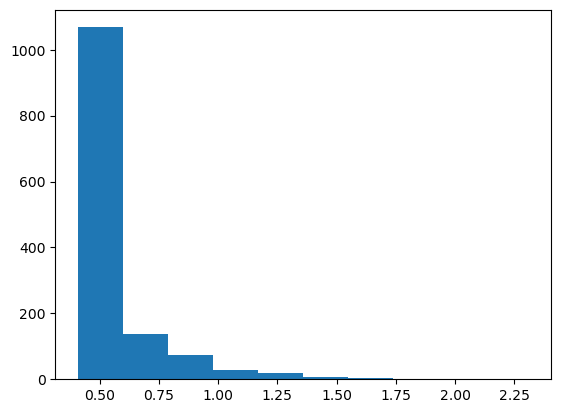

In [212]:
# Stage 1: estimate treatment propensities(d_hat) with lasso regression
obesity_lasso = LassoCV(cv=5).fit(X_obesity_scaled, d_obesity)
d_hat_obesity = obesity_lasso.predict(X_obesity_scaled) 
plt.hist(d_hat_obesity)
plt.show()

In [218]:
# Run the second lasso
lasso_obesity_2 = LassoCV(cv=5, max_iter=10000).fit(X_obesity_scaled, y_obesity)

In [249]:
# Extract selected variables from X 
X_scaled_df_obesity = pd.DataFrame(X_obesity_scaled, index=X_obesity.index, columns=X_obesity.columns)

# Convert d and d_hat to series for concat
d_series_obesity = pd.Series(d_obesity, index=X_scaled_df_obesity.index, name='treatment')
d_hat_series_obesity = pd.Series(d_hat_obesity, index=X_scaled_df_obesity.index, name='d_hat')

# Add d_hat and treatment indicator to X_train_scaled
X_final_obesity = pd.concat([X_scaled_df_obesity, d_series_obesity, d_hat_series_obesity], axis=1)

# Add intercept manually before fitting model
X_final_obesity = sm.add_constant(X_final_obesity)

In [220]:
X_final_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 29 to 65004
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   const                                      1338 non-null   float64
 1   quantity_dispensed                         1338 non-null   float64
 2   days_supply                                1338 non-null   float64
 3   patient_age                                1338 non-null   float64
 4   patient_state_AL                           1338 non-null   float64
 5   patient_state_AZ                           1338 non-null   float64
 6   patient_state_CA                           1338 non-null   float64
 7   patient_short_zip_351.0                    1338 non-null   float64
 8   patient_short_zip_352.0                    1338 non-null   float64
 9   patient_short_zip_442.0                    1338 non-null   float64
 10  patient_short_zip_606.

In [252]:
# Stage 2-2:Conduct the partial lasso, to keep treatment and d_hat unpenalized
apply_penalty = np.array([True] * 46 + [False, False])
alpha = 0.001 # L1 penalty term
max_iterations = 1000 # Optional, determines how long the model will look for an l1 penalty
model = SelectiveRegularizationLinearRegression(alpha, apply_penalty, max_iterations)
model.fit(X_final_obesity.values, y_obesity.values)

In [253]:
# Print the learned coefficients along with the variable names
coefficients = model.w
variable_names = X_final_obesity

# Create a dictionary to map variable names to the coefficients
coef_dict = {name: coef for name, coef in zip(variable_names, coefficients)}

# Print out the final result
for variable, coef in coef_dict.items():
    print(f"{variable}: {coef}")

const: 0.06427503736920777
quantity_dispensed: -0.01367774925938001
days_supply: -0.0037942210897392546
patient_age: -0.01224172378625676
patient_state_AL: -0.0013197381032558726
patient_state_AZ: -0.004541233340312538
patient_state_CA: 0.00024302624659504292
patient_short_zip_351.0: 0.0
patient_short_zip_352.0: 0.0
patient_short_zip_442.0: 0.0
patient_short_zip_606.0: 0.0
patient_short_zip_852.0: 0.0
patient_short_zip_853.0: 0.0
patient_short_zip_855.0: 0.0
patient_short_zip_856.0: 0.0
patient_short_zip_857.0: 0.0
patient_short_zip_859.0: 0.0
patient_short_zip_860.0: 0.0
patient_short_zip_863.0: 0.0
patient_short_zip_864.0: 0.0
patient_short_zip_891.0: 0.0
patient_short_zip_895.0: 0.0
patient_short_zip_900.0: 0.0018837927207040947
patient_short_zip_908.0: -0.008288348306376815
patient_short_zip_910.0: 0.028872105930245417
patient_short_zip_911.0: 0.009137457575940875
patient_short_zip_912.0: 0.0008343126395043709
patient_short_zip_913.0: -0.008917454832318511
patient_short_zip_921.0: 

### Hypertensive

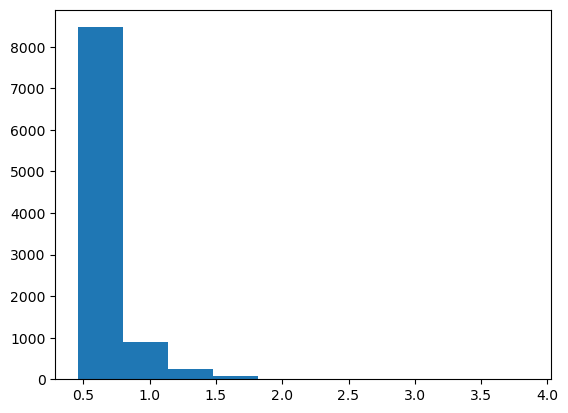

In [255]:
X_Hypertensive_scaled = scaler.fit_transform(X_hypertensive)
# Stage 1: estimate treatment propensities(d_hat) with lasso regression
hypertensive_lasso = LassoCV(cv=5).fit(X_hypertensive, d_hypertensive)
d_hat_hypertensive = hypertensive_lasso.predict(X_hypertensive) 
plt.hist(d_hat_hypertensive)
plt.show()

In [259]:
lasso_hyperhensive2 = LassoCV(cv=5, max_iter=10000).fit(X_Hypertensive_scaled, y_hypertensive)

In [260]:

X_scaled_df_hypertensive = pd.DataFrame(X_Hypertensive_scaled, index=X_hypertensive.index, columns=X_hypertensive.columns)

# Convert d and d_hat to series for concat
d_series_hypertensive = pd.Series(d_hypertensive, index=X_scaled_df_hypertensive.index, name='treatment')
d_hat_series_hypertensive = pd.Series(d_hat_hypertensive, index=X_scaled_df_hypertensive.index, name='d_hat')

# Add d_hat and treatment indicator to X_train_scaled
X_final_hypertensive = pd.concat([X_scaled_df_hypertensive, d_series_hypertensive, d_hat_series_hypertensive], axis=1)

# Add intercept manually before fitting model
X_final_hypertensive = sm.add_constant(X_final_hypertensive)

In [263]:
X_final_hypertensive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9708 entries, 18 to 65087
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   const                                      9708 non-null   float64
 1   quantity_dispensed                         9708 non-null   float64
 2   days_supply                                9708 non-null   float64
 3   patient_age                                9708 non-null   float64
 4   patient_state_AL                           9708 non-null   float64
 5   patient_state_AZ                           9708 non-null   float64
 6   patient_state_CA                           9708 non-null   float64
 7   patient_short_zip_351.0                    9708 non-null   float64
 8   patient_short_zip_352.0                    9708 non-null   float64
 9   patient_short_zip_442.0                    9708 non-null   float64
 10  patient_short_zip_606.

In [265]:
# Stage 2-2:Conduct the partial lasso, to keep treatment and d_hat unpenalized
apply_penalty = np.array([True] * 45 + [False, False])
alpha = 0.001 # L1 penalty term
max_iterations = 1000 # Optional, determines how long the model will look for an l1 penalty
model = SelectiveRegularizationLinearRegression(alpha, apply_penalty, max_iterations)
model.fit(X_final_hypertensive.values, y_hypertensive.values)

In [266]:
# Print the learned coefficients along with the variable names
coefficients = model.w
variable_names = X_final_hypertensive

# Create a dictionary to map variable names to the coefficients
coef_dict = {name: coef for name, coef in zip(variable_names, coefficients)}

# Print out the final result
for variable, coef in coef_dict.items():
    print(f"{variable}: {coef}")

const: 0.049134734239802226
quantity_dispensed: -0.004873890688024193
days_supply: -0.0008274311906171285
patient_age: -0.013957102514571695
patient_state_AL: 0.0
patient_state_AZ: 0.0013997222538975685
patient_state_CA: 0.0
patient_short_zip_351.0: 0.0
patient_short_zip_352.0: 0.0
patient_short_zip_442.0: 0.0
patient_short_zip_606.0: 0.0
patient_short_zip_852.0: -0.0023368347747072136
patient_short_zip_853.0: -0.003523224448032762
patient_short_zip_855.0: 0.0
patient_short_zip_856.0: 0.010817043918851237
patient_short_zip_857.0: 0.003939159857953565
patient_short_zip_859.0: -0.00017230254444173854
patient_short_zip_860.0: 0.00396968158694622
patient_short_zip_863.0: 0.0
patient_short_zip_864.0: -0.0005724735980215006
patient_short_zip_891.0: 0.0
patient_short_zip_895.0: 0.0
patient_short_zip_900.0: 0.007430599861279329
patient_short_zip_908.0: 0.004757629407497119
patient_short_zip_910.0: 0.005569568674784932
patient_short_zip_911.0: 0.0037527401108937487
patient_short_zip_912.0: 0.00

### Diabetes

In [268]:
X_diabetes_scaled = scaler.fit_transform(X_diabetes) # Scale the X variables first

# Stage 1: estimate treatment propensities(d_hat) with lasso regression
lasso_1_diabetes = LassoCV(cv=5, max_iter=10000).fit(X_diabetes_scaled, d_diabetes)
d_hat_d = lasso_1_diabetes.predict(X_diabetes_scaled)  # predict treatment propensities(d hat)

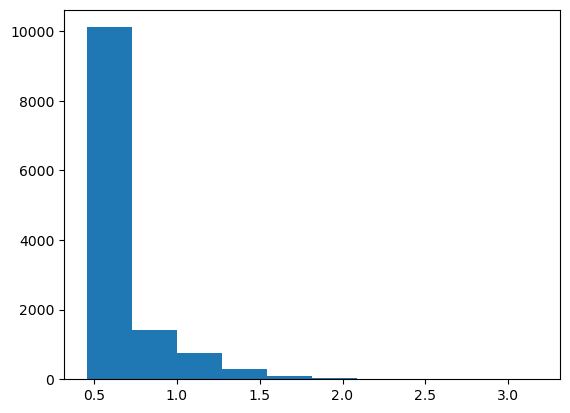

In [269]:
#  Run another Lasso for variable selection
lasso_2_diabetes = LassoCV(cv=5, max_iter=10000).fit(X_diabetes_scaled, y_diabetes)
d_hat_diabetes = hypertensive_lasso.predict(X_diabetes) 
plt.hist(d_hat_diabetes)
plt.show()

In [270]:

X_scaled_df_diabetes = pd.DataFrame(X_diabetes_scaled, index=X_diabetes.index, columns=X_diabetes.columns)

# Convert d and d_hat to series for concat
d_series_diabetes = pd.Series(d_diabetes, index=X_scaled_df_diabetes.index, name='treatment')
d_hat_series_diabetes = pd.Series(d_hat_diabetes, index=X_scaled_df_diabetes.index, name='d_hat')

# Add d_hat and treatment indicator to X_train_scaled
X_final_diabetes = pd.concat([X_scaled_df_diabetes, d_series_diabetes, d_hat_series_diabetes], axis=1)

# Add intercept manually before fitting model
X_final_diabetes = sm.add_constant(X_final_diabetes)

In [271]:
X_final_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12736 entries, 3 to 65080
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   const                                      12736 non-null  float64
 1   quantity_dispensed                         12736 non-null  float64
 2   days_supply                                12736 non-null  float64
 3   patient_age                                12736 non-null  float64
 4   patient_state_AL                           12736 non-null  float64
 5   patient_state_AZ                           12736 non-null  float64
 6   patient_state_CA                           12736 non-null  float64
 7   patient_short_zip_351.0                    12736 non-null  float64
 8   patient_short_zip_352.0                    12736 non-null  float64
 9   patient_short_zip_442.0                    12736 non-null  float64
 10  patient_short_zip_606.

In [272]:
# Stage 2-2:Conduct the partial lasso, to keep treatment and d_hat unpenalized
apply_penalty = np.array([True] * 45 + [False, False])
alpha = 0.001 # L1 penalty term
max_iterations = 1000 # Optional, determines how long the model will look for an l1 penalty
model = SelectiveRegularizationLinearRegression(alpha, apply_penalty, max_iterations)
model.fit(X_final_diabetes.values, y_diabetes.values)

In [273]:
# Print the learned coefficients along with the variable names
coefficients = model.w
variable_names = X_final_diabetes

# Create a dictionary to map variable names to the coefficients
coef_dict = {name: coef for name, coef in zip(variable_names, coefficients)}

# Print out the final result
for variable, coef in coef_dict.items():
    print(f"{variable}: {coef}")

const: 0.12806218592964824
quantity_dispensed: 0.0
days_supply: 0.0
patient_age: -0.012741078136722903
patient_state_AL: 0.0006006219795144117
patient_state_AZ: -0.007551130410439328
patient_state_CA: 0.00018908707317558855
patient_short_zip_351.0: -0.00025183837650403563
patient_short_zip_352.0: 0.0
patient_short_zip_442.0: -0.0007979411935036298
patient_short_zip_606.0: 0.0
patient_short_zip_852.0: 0.0
patient_short_zip_853.0: -0.0018665229136459501
patient_short_zip_855.0: 0.0
patient_short_zip_856.0: -0.0007981222360856485
patient_short_zip_857.0: 0.001972776618438073
patient_short_zip_859.0: 0.0007697749559852113
patient_short_zip_860.0: 0.0
patient_short_zip_863.0: 0.007472340842183376
patient_short_zip_864.0: -0.000934601757867163
patient_short_zip_891.0: 0.0
patient_short_zip_895.0: -0.0001475933036109231
patient_short_zip_900.0: 0.006786326506586971
patient_short_zip_908.0: 0.004948226755993534
patient_short_zip_910.0: 0.00797828198325554
patient_short_zip_911.0: 0.00486770814

## 5. Model Evaluation and Interpretation

### Obesity ~ Ozempic

Treatment Effect: After patial lasso regression, the coefficient of treatment is -0.00526534786315641, meaning the Ozempic treatment has slight negative effect on Obesity 

Whats more. Some other factors such as geographic location of the patient seems to negatively impact obesity, like patient_short_zip_922.0: -0.01714427581071283, Males are more like to have obesity, patient_gender_M: 0.016054982497350465, and as time goes, patients are less likely to have obesity year: -0.010083332441255713. Most coefficients make sense in real life, some states might have better medical resources, or people there tend to eat healthier food, males generally weight more, and patients are more likely to intentionally lose weight once they are diagnosied obesity.

I included all the X variables into the second lasso regression because the confounding effects have been caught by d_hat



### Hypertensive ~ Ozempic

Treatment Effect: After patial lasso regression, I coefficient of treatment is -0.0002370506909185703, meaning the Ozempic treatment has slight negative effect on Obesity 

Other factors also come into place influencing hypertensive, for example, location: patient_short_zip_921.0: 0.01031604784255635
patient_short_zip_922.0: -0.012347787065995833. But suprisingly, year has a positive effect on the Hypertensive diagnosis: year: 0.0011594039575957907

I included all the X variables into the second lasso regression because the confounding effects have been caught by d_hat

### Diabete ~ Ozempic

The coefficient of treatment is a positive number: 0.0032406428407697934, impying that Ozempic will increase the likelyhood of being diagnosed diabete, which is a total suprise. It might because some important factors are not caught by the model.

But as for this model, I have to call the Ozempic unrelated to diabete outcome

I included all the X variables into the second lasso regression because the confounding effects have been caught by d_hat

## 6. Additional Insights

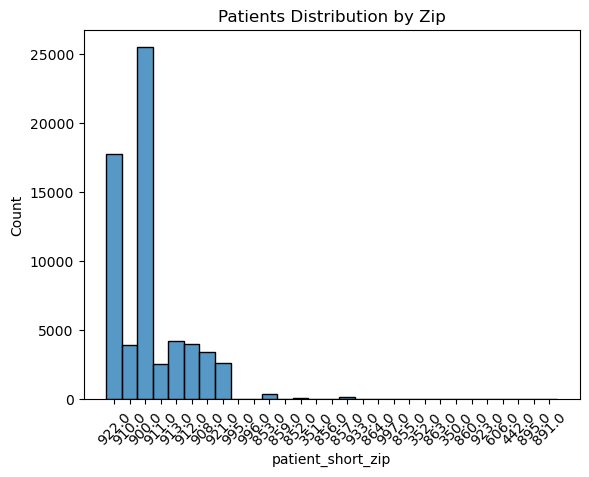

In [312]:
# Medical_edited datafram has been changed to that only patients diagnosed ill will remin in the dataframe, so distribution of zip will show the distribution of patients
sns.histplot(medical_edited['patient_short_zip'].astype(str), bins = 20)
plt.title('Patients Distribution by Zip')
plt.xticks(rotation=45)
plt.show()

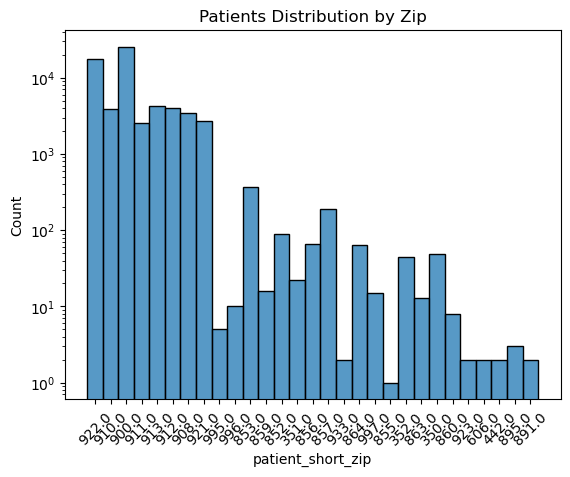

In [310]:
sns.histplot(medical_edited['patient_short_zip'].astype(str), bins = 10)
plt.title('Patients Distribution by Zip')
plt.yscale('log') 
plt.xticks(rotation=45)
plt.show()

In [290]:
medical_edited.columns

Index(['journey_id', 'claim_date', 'patient_state', 'patient_short_zip',
       'patient_age', 'patient_gender', 'visit_type', 'obesity_diag1',
       'obesity_diag2', 'hypertensive_diag1', 'hypertensive_diag2',
       'hyperglyceridemia_diag1', 'hyperglyceridemia_diag2', 'diabetes_diag1',
       'diabetes_diag2'],
      dtype='object')

In [293]:
# Create a dataframe where all observations have obesity_diag1 = 1
obesity_df = medical_edited.query('obesity_diag1 == 1')

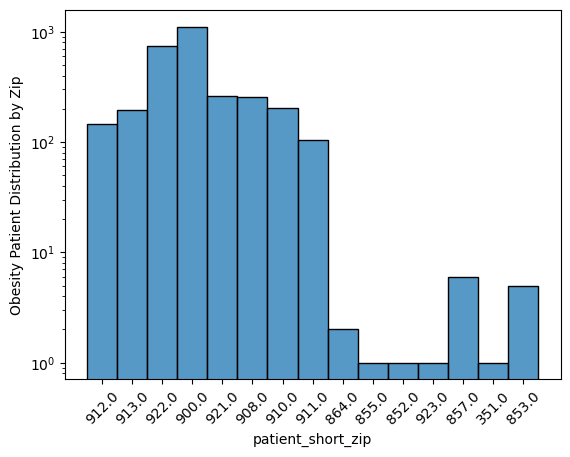

In [309]:
# Plot the obesity distribution by location
sns.histplot(obesity_df['patient_short_zip'].astype(str), bins = 10)
plt.yscale('log')
plt.xticks(rotation=45)
plt.ylabel('Obesity Patient Distribution by Zip')
plt.show()

In [298]:
# Create a dataframe where all observations have hypertensive_diag1 = 1
hypertensive_df = medical_edited.query('hypertensive_diag1 == 1')

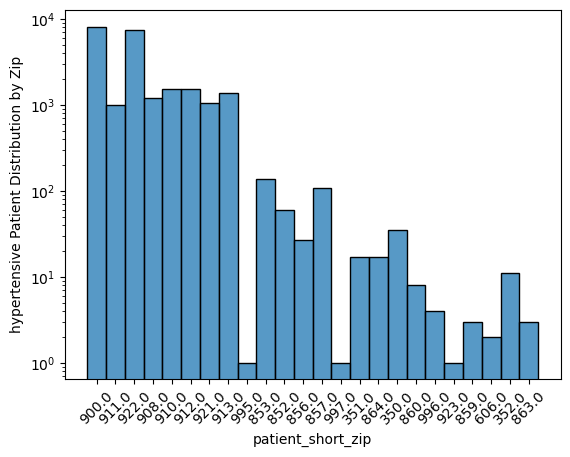

In [308]:
# Plot the obesity distribution by location
sns.histplot(hypertensive_df['patient_short_zip'].astype(str), bins = 10)
plt.yscale('log')
plt.xticks(rotation=45)
plt.ylabel('hypertensive Patient Distribution by Zip')
plt.show()

In [301]:
# Create a dataframe where all observations have diabetes_diag1 = 1
diabetes_df = medical_edited.query('diabetes_diag1 == 1')

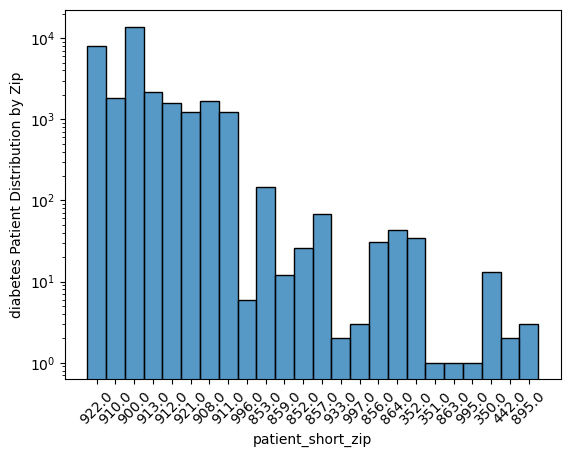

In [307]:
# Plot the obesity distribution by location
sns.histplot(diabetes_df['patient_short_zip'].astype(str), bins = 10)
plt.yscale('log')
plt.xticks(rotation=45)
plt.ylabel('diabetes Patient Distribution by Zip')
plt.show()

We can see from diagrams that some places have more residents diagnosed either obese, hypersive, or diabete. Meanwhile, some zip codes have more of one kind of patients than other kinds. For example, zip code 853 has more hypertensive patients and diabetes patients than obese patients.
This might interact with the treatment effects because different places have different amount of patients, and some places might have less usage of Ozempic. Most importantly, my model doesn't catch the dose of Ozempic that each patient takes. these diagrams indicates that the models might need further improvement